In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
from data_utils import *

In [3]:
data = pd.read_csv('./data/salary2.csv')

In [53]:
data2 = pd.read_csv('./data/salary2.csv')

## 분석목적
* 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
* 연봉이 5만달러 이상인지 아닌지(타겟변수)<br>
<br>
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [4]:
data.head(3)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


🧼 [결측치 비율 확인]

 - workclass: 5.7% △ 주의
 - occupation: 5.8% △ 주의
 - native-country: 1.8% △ 주의

📊 [숫자형 변수 이상값 리포트]

📌 age
 - Median: 37.00
 - Max: 90.00 / Min: 17.00
 - Mean ± 3*Std: [-2.49, 79.78]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 186건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-2.00, 78.00]
 - IQR 기준 이상값: 216건
   → 🚨 이상값 의심됨 (IQR 기준)



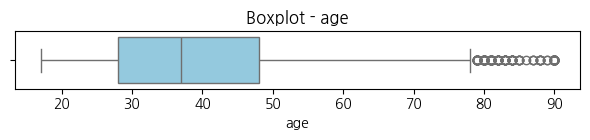

📌 education-num
 - Median: 10.00
 - Max: 16.00 / Min: 1.00
 - Mean ± 3*Std: [2.37, 17.79]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 330건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [4.50, 16.50]
 - IQR 기준 이상값: 1794건
   → 🚨 이상값 의심됨 (IQR 기준)



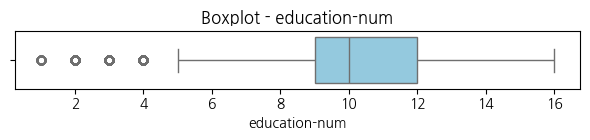

📌 capital-gain
 - Median: 0.00
 - Max: 99999.00 / Min: 0.00
 - Mean ± 3*Std: [-21276.99, 23435.12]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 331건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 4035건
   → 🚨 이상값 의심됨 (IQR 기준)



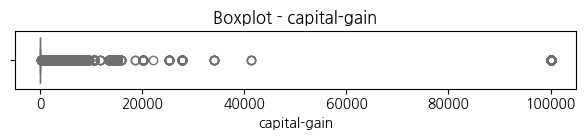

📌 capital-loss
 - Median: 0.00
 - Max: 4356.00 / Min: 0.00
 - Mean ± 3*Std: [-1121.51, 1296.52]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2216건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 2282건
   → 🚨 이상값 의심됨 (IQR 기준)



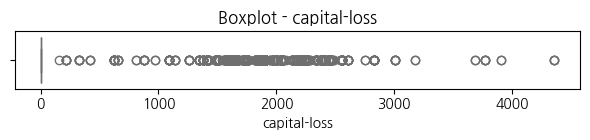

📌 hours-per-week
 - Median: 40.00
 - Max: 99.00 / Min: 1.00
 - Mean ± 3*Std: [3.25, 77.60]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 681건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [32.50, 52.50]
 - IQR 기준 이상값: 13496건
   → 🚨 이상값 의심됨 (IQR 기준)



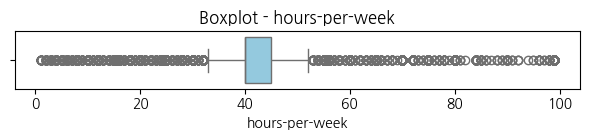


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - workclass: 희귀값 31개 (0.1%) → ⚠️ 희귀 범주 존재
 - education: 희귀값 330개 (0.7%) → ⚠️ 희귀 범주 존재
 - marital-status: 희귀값 37개 (0.1%) → ⚠️ 희귀 범주 존재
 - occupation: 희귀값 257개 (0.5%) → ⚠️ 희귀 범주 존재
 - relationship: ✅ 전부 적정 분포
 - race: 희귀값 876개 (1.8%) → ⚠️ 희귀 범주 존재
 - sex: ✅ 전부 적정 분포
 - native-country: 희귀값 3202개 (6.6%) → ⚠️ 희귀 범주 존재
 - class: ✅ 전부 적정 분포


In [6]:
detailed_outlier_report(data)

# 결측값

In [7]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

### 1) workclass, occupation

In [8]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [9]:
pd.set_option('display.min_rows',100)
data[data['workclass'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
75,17,NaN,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
100,51,NaN,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,18,United-States,<=50K
113,20,NaN,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,20,United-States,<=50K
132,20,NaN,HS-grad,9,Never-married,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [10]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
data[
    (data['workclass'].isna()) &
    (data['class']==' <=50K')
]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
75,17,NaN,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
100,51,NaN,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,18,United-States,<=50K
113,20,NaN,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,20,United-States,<=50K
132,20,NaN,HS-grad,9,Never-married,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
185,64,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,8,United-States,<=50K


* workclass가 결측값일 경우 occupation도 결측값인 것으로 보임
* 이는 무직이라는 것인가?

In [12]:
data[
    (data['occupation'].isna()) &
    (~data['workclass'].isna())
]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [13]:
data[
    data['workclass']==' Never-worked'
]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


* workclass가 Never-worked이면 occupation이 NaN이다

In [14]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [15]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

* workclass의 결측값은 2799개이고 occupation의 결측값은 2809개
* workclass가 결측값일 경우 occupation도 결측값인 것을 보아 상관관계가 있는 것으로 보임
* 무직인 경우 이런 식의 데이터를 가지는 것인가 생각해봄
* workclass의 unique() 값을 확인해보면 array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object) 이런 식인데 여기에 무직이 있는 것인지 없는 것인지는 잘 모르겠음.
* 또한 workclass가 Never-worked 이면 occupation이 결측값인 것으로 보임
* workclass가 결측값인 것 2799개 + workclass가 Never-worked인 것 10개 = occupation 결측값 2809개가 나오는 것으로 보임
* 결측률은 5.7~5.8% 정도로 높지는 않지만 workclass와 occupation간의 상관관계를 갖는다는 점에서 섣불리 삭제를 하지 못하고 있음
* 최빈값인 Prof-specialty(6172개)로 대체하기에는 바로 다음으로 많은 Craft-repair(6112개)와 Exec-managerial(6086개) 굉장히 근소한 차이를 이루고 있어서 적절하지 않아보임
* 직업 자체가 없는데 해당 데이터를 종속변수(연봉)를 고려하는 데이터로서 가치가 있는지에 대해서 부정적인 견해가 있음
* 그러나 데이터 분포를 보아 2800여 개의 데이터를 삭제하는 것은 아쉬움이 있고 workclass가 Never-worked인 것은 다른 관점의 분석에 용이할 수 있음
* 따라서 workclass과 occupation의 결측값을 'Unknown'으로 처리
* workclass가 Never-worked인 occupation은 'No-occupation'으로 처리

In [16]:
data.loc[data['workclass']==' Never-worked','occupation'] = 'No-occupation'

In [17]:
data[data['workclass']==' Never-worked']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,No-occupation,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,No-occupation,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,No-occupation,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,No-occupation,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,No-occupation,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,No-occupation,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,No-occupation,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,No-occupation,Own-child,White,Male,0,0,4,United-States,<=50K


In [18]:
data['workclass'] = data['workclass'].fillna('Unknown')
data['occupation'] = data['occupation'].fillna('Unknown')

### 2) native-country

In [19]:
data[data['native-country'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
83,44,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
188,34,State-gov,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
253,42,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K
305,37,Local-gov,Bachelors,13,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,NaN,<=50K
329,64,Self-emp-not-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,NaN,>50K
403,27,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,36,NaN,<=50K
420,65,Private,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,NaN,<=50K
471,28,State-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,10,NaN,<=50K


In [20]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

* native-country의 결측률은 1.8%로 낮은 편이고 최빈값으로 대체하는 것이 적절하지 않아보이기 때문에 해당 행을 삭제를 고민 중
* 결측률이 1.8%이기는 하나 결측값이 857개로 최빈값인 미국이 아닌 다른 나라일 경우 유의미하게 국가 비중에 영향을 줄 것이라 판단해서 최빈값 대체가 적절하지 않다고 생각함
* 하지만 삭제를 하게 되면 다른 소수의 국가들의 분포를 고려했을 때 아쉬움. 그리고 현재 분석 목적에 국가가 독립변수를 독립변수로 생각하지 않음. 
* 따라서 'Unknown'으로 별도 처리

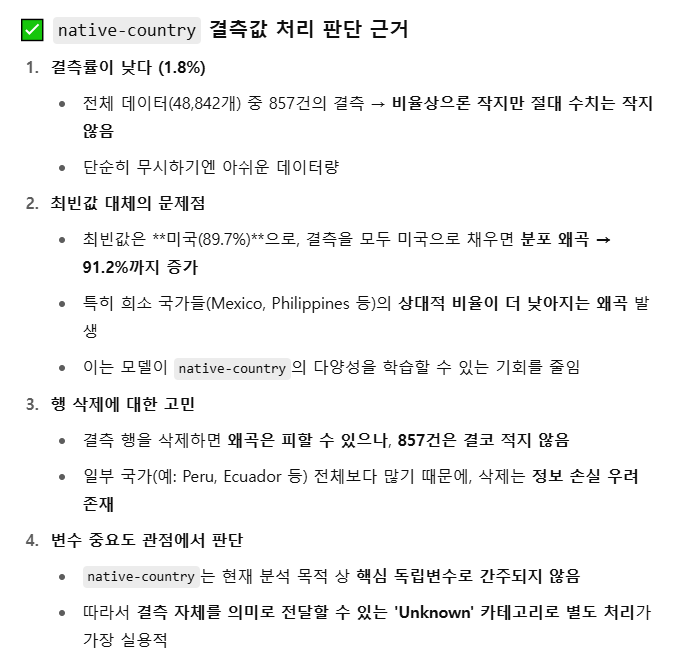

In [21]:
data['native-country'].fillna('Unknown', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13640\607175230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].fillna('Unknown', inplace=True)


In [22]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

# 이상값

🧼 [결측치 비율 확인]


📊 [숫자형 변수 이상값 리포트]

📌 age
 - Median: 37.00
 - Max: 90.00 / Min: 17.00
 - Mean ± 3*Std: [-2.49, 79.78]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 186건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-2.00, 78.00]
 - IQR 기준 이상값: 216건
   → 🚨 이상값 의심됨 (IQR 기준)



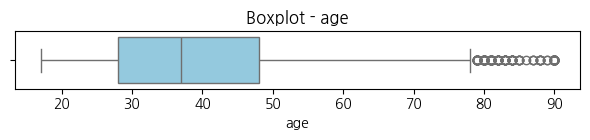

📌 education-num
 - Median: 10.00
 - Max: 16.00 / Min: 1.00
 - Mean ± 3*Std: [2.37, 17.79]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 330건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [4.50, 16.50]
 - IQR 기준 이상값: 1794건
   → 🚨 이상값 의심됨 (IQR 기준)



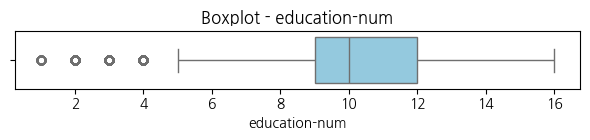

📌 capital-gain
 - Median: 0.00
 - Max: 99999.00 / Min: 0.00
 - Mean ± 3*Std: [-21276.99, 23435.12]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 331건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 4035건
   → 🚨 이상값 의심됨 (IQR 기준)



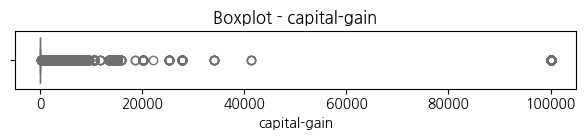

📌 capital-loss
 - Median: 0.00
 - Max: 4356.00 / Min: 0.00
 - Mean ± 3*Std: [-1121.51, 1296.52]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2216건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 2282건
   → 🚨 이상값 의심됨 (IQR 기준)



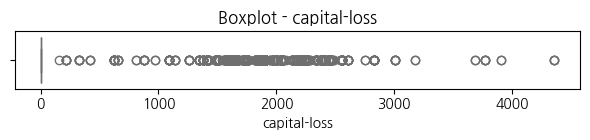

📌 hours-per-week
 - Median: 40.00
 - Max: 99.00 / Min: 1.00
 - Mean ± 3*Std: [3.25, 77.60]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 681건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [32.50, 52.50]
 - IQR 기준 이상값: 13496건
   → 🚨 이상값 의심됨 (IQR 기준)



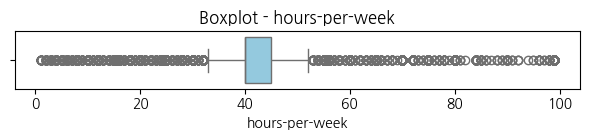


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - workclass: 희귀값 31개 (0.1%) → ⚠️ 희귀 범주 존재
 - education: 희귀값 330개 (0.7%) → ⚠️ 희귀 범주 존재
 - marital-status: 희귀값 37개 (0.1%) → ⚠️ 희귀 범주 존재
 - occupation: 희귀값 267개 (0.5%) → ⚠️ 희귀 범주 존재
 - relationship: ✅ 전부 적정 분포
 - race: 희귀값 876개 (1.8%) → ⚠️ 희귀 범주 존재
 - sex: ✅ 전부 적정 분포
 - native-country: 희귀값 3202개 (6.6%) → ⚠️ 희귀 범주 존재
 - class: ✅ 전부 적정 분포


In [23]:
detailed_outlier_report(data)

In [24]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


* 나이는 최소 17세, 최대 90세로 큰 이상은 없어보임
* 90세가 아직 일한다는 게 좀 어려워 보이긴 하나 불가능한 것은 아니므로 넘어감
* education-num은 1에서 16까지 초등학교부터 대학교 과정까지를 말하는 것으로 보임. 큰 이상은 없는 것 같음.
* capital-gain과 capital-loss는 데이터 분포가 너무 상이하지만 자산 가치와 증가는 모 아니면 도이고, 어떤 자산을 새로 구매하거나 했을 때의 증가치는 상당히 높을 것으로 예상되므로 문제는 없어보임
* **hours-per-week**는 평일인 주 5일 기준으로 계산되어야하는 것을 생각해보면 이상치가 상당히 많은 것으로 생각됨

In [25]:
data.corr(numeric_only=True)

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


In [26]:
pd.get_dummies(data, drop_first=True).corr(method='spearman')

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_No-occupation,occupation_Unknown,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_Unknown,class_ >50K
age,1.000000,0.063212,0.124436,0.057584,0.146604,0.067320,-0.021488,-0.182164,0.103037,0.141760,0.019905,0.009219,-0.015960,-0.104345,-0.060133,0.037511,0.032491,0.095016,0.015743,-0.005619,0.006485,0.020035,0.075340,0.021580,0.108620,0.009532,0.065765,-0.122332,-0.014658,0.348792,0.018658,-0.581655,0.024398,0.226055,-0.009329,0.025674,0.113517,0.026667,-0.098393,-0.010746,-0.098704,0.015930,0.067191,0.003593,-0.036709,-0.013713,0.039357,-0.021488,-0.015960,-0.021431,-0.077576,-0.472201,0.056787,0.034107,-0.009122,-0.013273,-0.034021,0.027836,0.100375,0.021437,0.013364,0.003148,0.029009,-0.000871,-0.002978,-0.021729,0.005859,0.004021,0.000003,0.016718,-0.021258,0.002547,-0.002143,-0.005200,-0.007229,0.014213,0.001451,0.001254,-0.000137,0.024395,-0.004108,-0.001749,-0.004901,-0.051389,-0.006093,0.000630,-0.004130,0.006406,0.011570,0.006918,0.007647,0.010997,-0.003361,-0.011056,-0.000168,0.002743,0.009006,-0.013126,0.003741,0.003608,0.269433
education-num,0.063212,1.000000,0.118871,0.077017,0.164437,0.100896,-0.014368,-0.122573,0.075998,0.013811,0.104815,-0.011155,-0.068624,-0.279550,-0.155814,-0.125595,-0.177960,-0.237374,-0.202958,0.154161,0.147809,0.526574,0.194736,-0.508789,0.378040,-0.073178,0.224477,0.125008,0.002369,0.078587,-0.023529,-0.024544,-0.057815,-0.067295,0.003114,-0.158182,0.211890,-0.093273,-0.133766,-0.163821,-0.168854,-0.059287,0.415543,0.005123,0.037299,0.074996,-0.133290,-0.014368,-0.068624,0.062649,-0.082845,-0.100085,-0.061863,0.036068,0.068969,-0.081007,-0.033677,0.049741,0.003404,0.013160,0.022683,-0.013837,-0.008081,-0.038329,-0.007714,-0.051307,0.017940,0.020851,0.022014,-0.002865,-0.046462,-0.018310

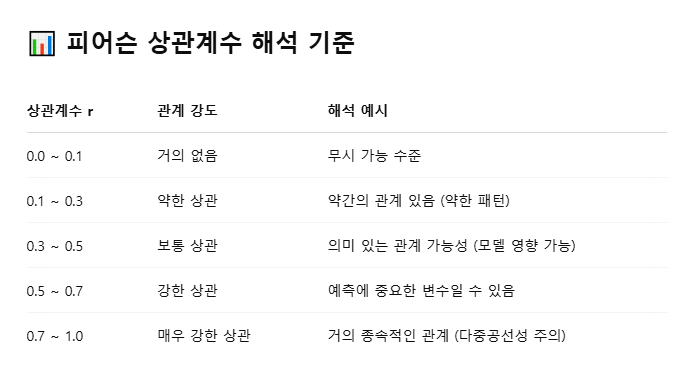

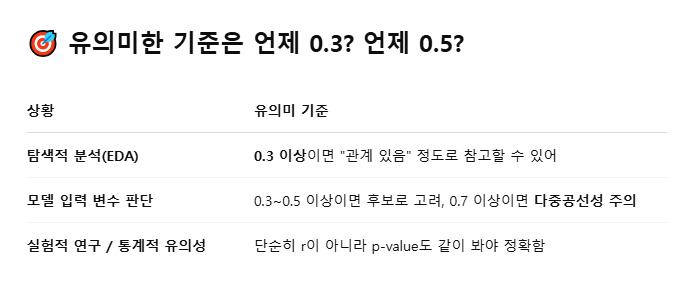

# class를 먼저 0/1로 변경 후 범주별 >50K 비율 확인!!

In [27]:
categorical = data.select_dtypes(exclude=['number']).columns.tolist()
data.loc[:,categorical]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Unknown,Some-college,Never-married,Unknown,Own-child,White,Female,United-States,<=50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
6,Unknown,HS-grad,Never-married,Unknown,Unmarried,Black,Male,United-States,<=50K
7,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
8,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,United-States,<=50K
9,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K


In [28]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [29]:
data[categorical].nunique()

workclass          9
education         16
marital-status     7
occupation        16
relationship       6
race               5
sex                2
native-country    42
class              2
dtype: int64

In [30]:
data['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [31]:
data['education-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

* education이랑 education-num이랑 같은 의미를 갖는 것으로 보임

In [32]:
data.loc[:,['education','education-num']]

,education,education-num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
5,10th,6
6,HS-grad,9
7,Prof-school,15
8,Some-college,10
9,7th-8th,4


In [33]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Unknown,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Unknown,HS-grad,9,Never-married,Unknown,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [34]:
data_temp = data.drop(['education','native-country','occupation' ],axis=1)
data_temp

,age,workclass,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class
0,25,Private,7,Never-married,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Husband,White,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,>50K
4,18,Unknown,10,Never-married,Own-child,White,Female,0,0,30,<=50K
5,34,Private,6,Never-married,Not-in-family,White,Male,0,0,30,<=50K
6,29,Unknown,9,Never-married,Unmarried,Black,Male,0,0,40,<=50K
7,63,Self-emp-not-inc,15,Married-civ-spouse,Husband,White,Male,3103,0,32,>50K
8,24,Private,10,Never-married,Unmarried,White,Female,0,0,40,<=50K
9,55,Private,4,Married-civ-spouse,Husband,White,Male,0,0,10,<=50K


## one-hot encoding

In [35]:
pd.get_dummies(data_temp, drop_first=True)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,class_ >50K
0,25,7,0,0,40,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
1,38,9,0,0,50,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,28,12,0,0,40,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,44,10,7688,0,40,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
4,18,10,0,0,30,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
5,34,6,0,0,30,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False
6,29,9,0,0,40,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False
7,63,15,3103,0,32,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
8,24,10,0,0,40,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
9,55,4,0,0,10,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


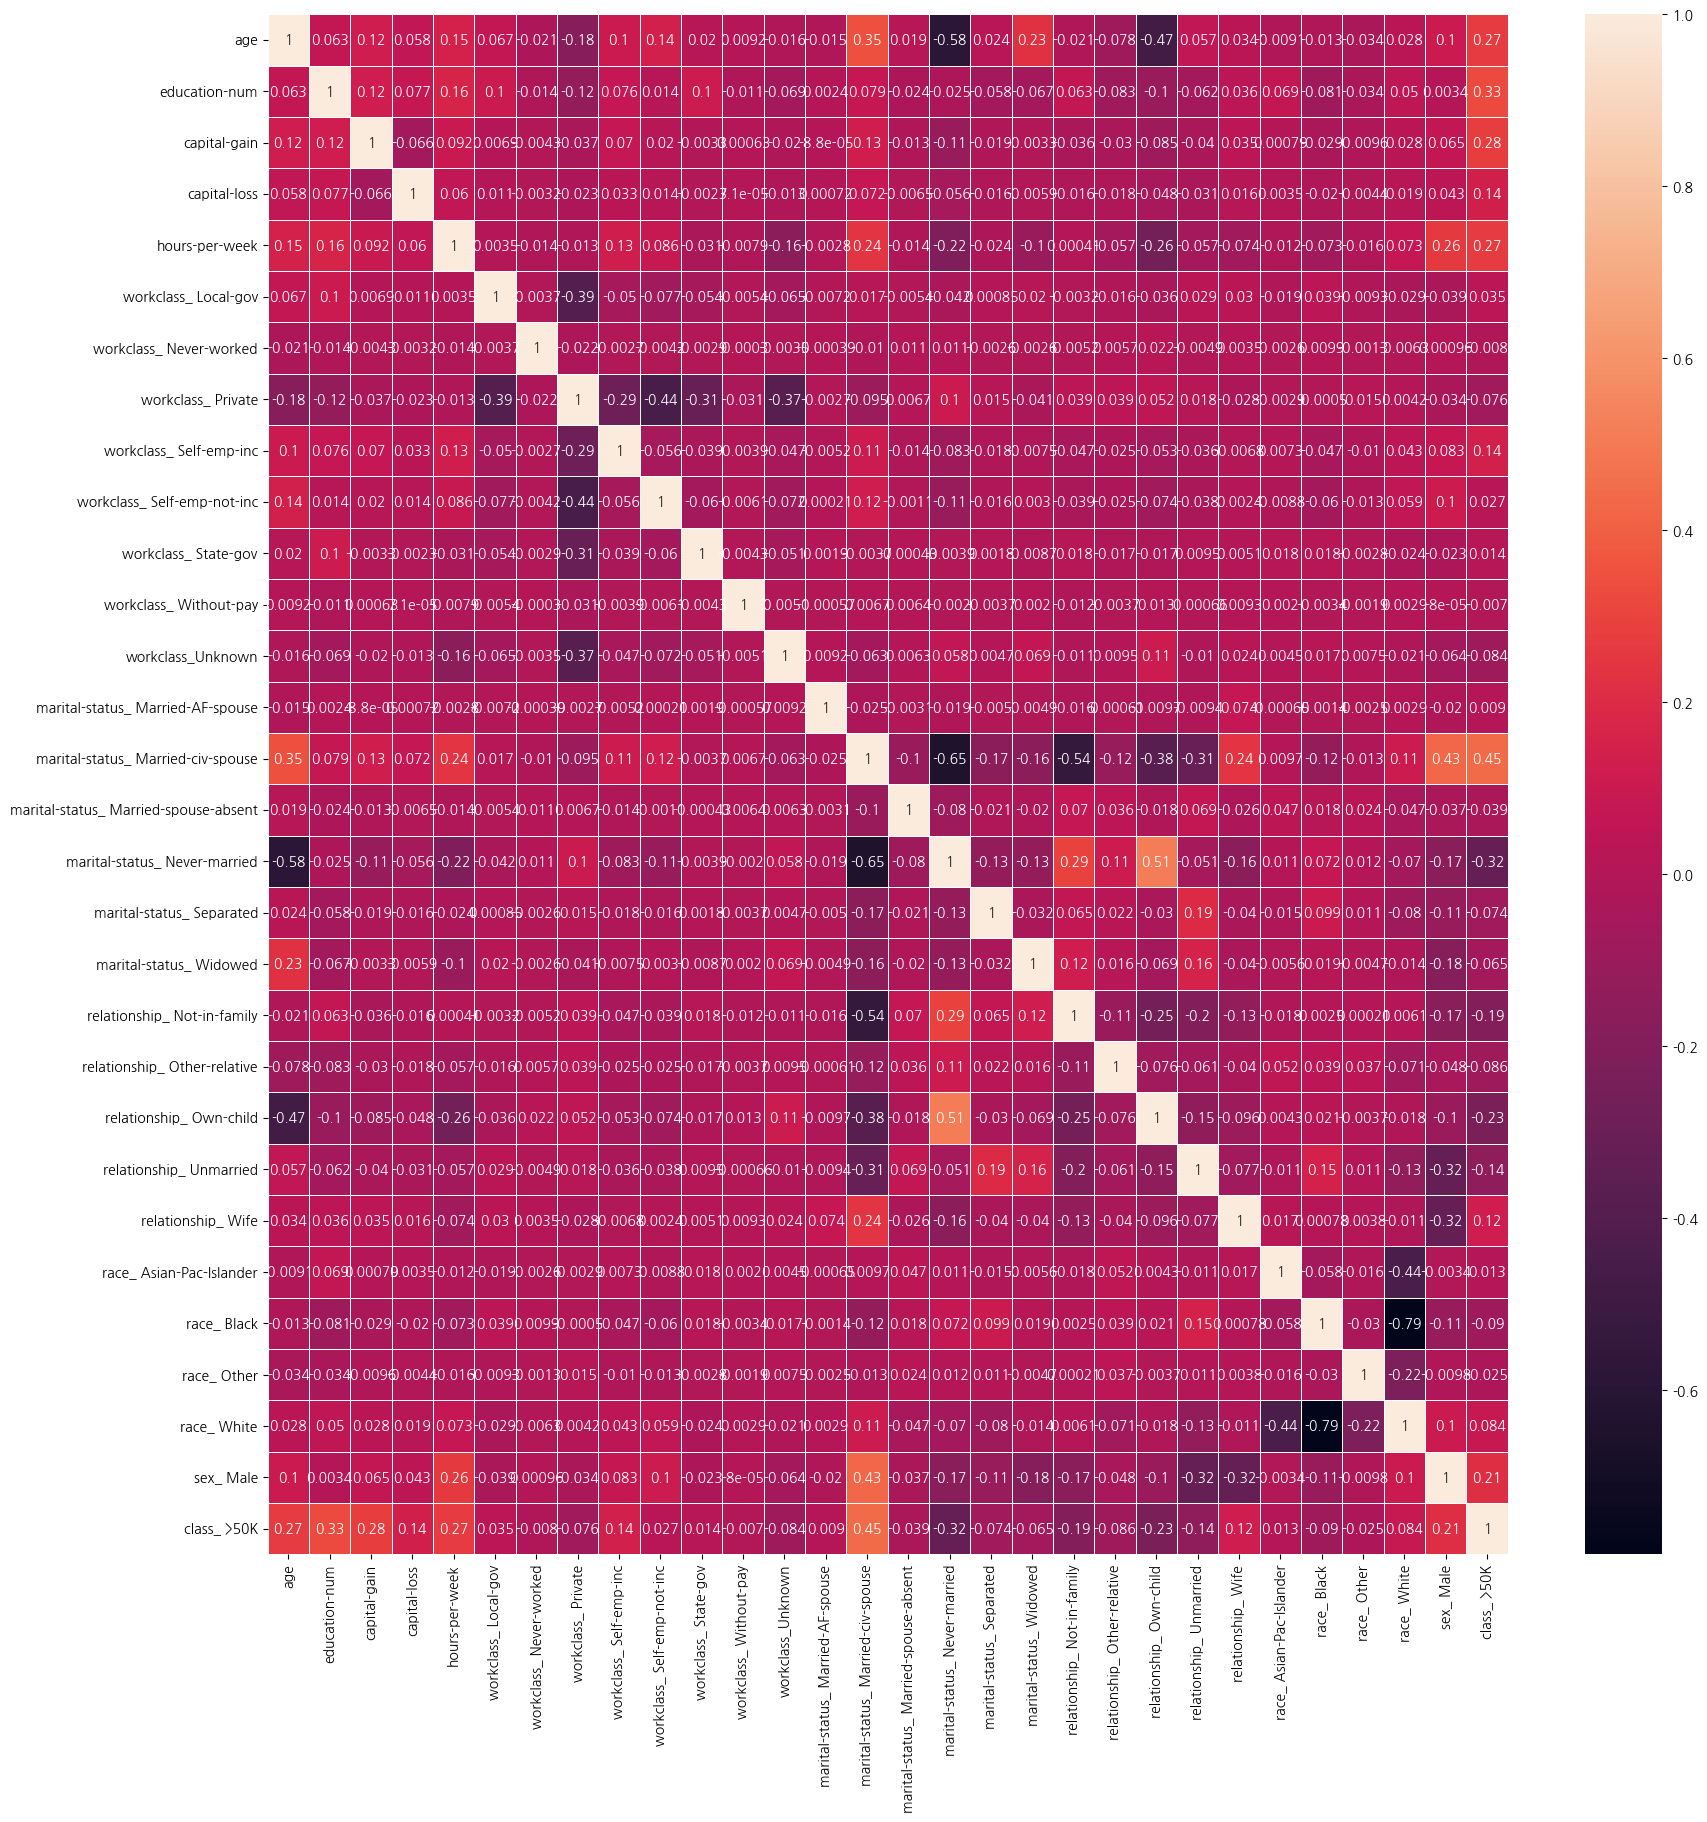

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.get_dummies(data_temp, drop_first=True).corr(method='spearman'), annot=True, linewidths=0.5)
plt.show()

# 모델

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [38]:
X = pd.get_dummies(data_temp).drop(['class_ >50K', 'class_ <=50K'], axis=1)
y = pd.get_dummies(data_temp, drop_first=True)['class_ >50K']

In [39]:
X

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,7,0,0,40,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
1,38,9,0,0,50,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
2,28,12,0,0,40,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
3,44,10,7688,0,40,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4,18,10,0,0,30,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False
5,34,6,0,0,30,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
6,29,9,0,0,40,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
7,63,15,3103,0,32,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True
8,24,10,0,0,40,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False
9,55,4,0,0,10,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [47]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.826247184876817
              precision    recall  f1-score   support

       False       0.87      0.90      0.89     11127
        True       0.65      0.59      0.62      3526

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.75     14653
weighted avg       0.82      0.83      0.82     14653



In [45]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(accuracy_score(y_test, pred))

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 중요도 추출
importances = dtc.feature_importances_
feature_names = X.columns

# pandas 시리즈로 정리해서 내림차순 정렬
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 상위 20개 변수 시각화
plt.figure(figsize=(10, 6))
feat_importance.head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Decision Tree)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_feat = feat_importance.head(20).reset_index()
top_feat.columns = ['Feature', 'Importance']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_feat, x='Importance', y='Feature', hue='Feature', dodge=False, palette='viridis', legend=False)

plt.title("Top 20 Feature Importances (Decision Tree)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 모델 성능 튜닝(하이퍼파라미터 튜닝)

In [ ]:
for i in range(1,11):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print('='*30, f'max_depth : {i}','='*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

# DecisionTree 시각화

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(dtc, max_depth=3,feature_names=dtc.feature_names_in_, fontsize=15, filled=True)
plt.show()

# 데이터분석 모델의 성능 평가

### 1. accuracy(정확도/정분류율)
* 1을 1이라고 맞히고 0을 0이라고 맞힌 비율
### 2. False Positive Rate(오분류율)
* 1을 0이라고 예측하고 0을 1이라고 예측해서 잘못 예측한 것
### 3. precision(정밀도)
* 예측한 것 중에서 실제로 맞은 것
* 예측 positive 중에서 실제 positive인 비율
* 예측이 중요한 경우
### 4. recall(재현율/민감도)
* 실제값을 실제값으로 잘 예측한 것
* 실제 positive 중에서 예측 positive가 맞은 것
* 실제값을 맞히는 것이 더 중요할 경우
* ex) 암환자는 암이 아닌데 암이라고 판단한 것은 검사했을 때 아니라면 괜찮고 생명의 지장이 없지만 진짜 암이었을 때 암이 아니라고 판단하면 큰일.
* ex) 보안시스템
### 5. F1-Score
* precision과 recall의 조화 평균
### 6. specificity(특이도)
* recall과 반대되는 개념
* 실제 negative 중 예측에 성공한 비율

## precision과 recall은 반비례(trade-off)

# confusion matrix (혼동행렬)
* R의 경우

|              |    예측 Positive   |    예측 Negative    |
|--------------|--------------------|---------------------|
|**실제 Positive** | TP (True Positive) | FN (False Negative) |
|**실제 Negative** | FP (False Positive) | TN (True Negative) |

* **TP** : 실제와 예측 모두 Positive
* ex) 실제 연봉 5만, 예측 연봉 5만
* **TN** : 실제 Negative, 예측 Negative
* ex) 실제 연봉 5만 X, 예측 연봉 5만 X
* **FP**(1형 오류) : 실제 Negative 예측 Positive
* ex) 실제 연봉 5만 X, 예측 연봉 5만 O
* **FN**(2형 오류) : 실제 Positive 예측 Negative
* ex) 실제 연봉 5만 O, 예측 연봉 5만 X

## 파이썬 sklearn
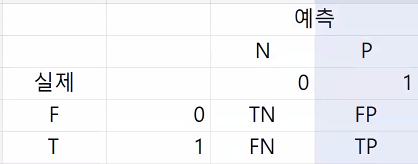

## R
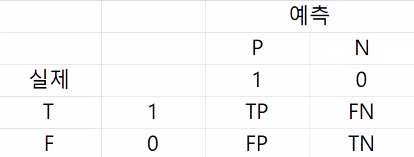

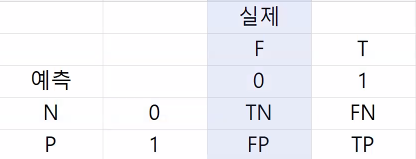

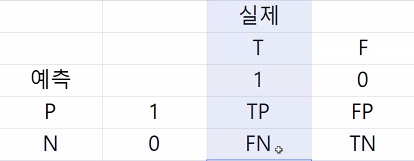

### 정확도(accuracy_score)
* (TP + TN) / (TP + TN + FP + FN)
### 오분류율(FPR)
* (FP + FN) / (TP + TN + FP + FN)
### 정밀도(precision)
* TP / (TP + FP)
### 재현율/민감도(recall)
* TP / (TP + FN)
### F1-Score
* $  F1-Score = 2 \cdot {Precision \cdot Recall \over Precision + Recall} $
### 특이도(specificity)
* TN / (FP + TN) 

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
print(confusion_matrix(y_test, pred))

[[10031  1096]
 [ 1425  2101]]


In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.88      0.90      0.89     11127
        True       0.66      0.60      0.63      3526

    accuracy                           0.83     14653
   macro avg       0.77      0.75      0.76     14653
weighted avg       0.82      0.83      0.82     14653



## 데이터 분석의 핵심은 나를 믿지 말아라 알고리즘을 믿어라
* 데이터 분석 : 화이트 노가다

### 실무에서는 dataset과 알고리즘 각각 여러개로 데이터분석

# EDA를 간편하게 하자
* ydata 라이브러리
* https://github.com/ydataai/ydata-profiling

In [48]:
from ydata_profiling import ProfileReport

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [54]:
profile = ProfileReport(data2, title="Profiling Report")

In [55]:
profile.to_file("salary2_eda.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 131.45it/s]


## y-data의 결과를 통해 데이터 전처리

In [57]:
# 결측값 처리
data2 = data2.dropna()

In [60]:
# 중복 확인
data2.duplicated().sum()

np.int64(5982)

In [63]:
# 중복 처리
data2 = data2.drop_duplicates().reset_index(drop=True)

In [64]:
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [66]:
# high relation 제거
data2 = data2.drop(['education','relationship'], axis=1)

In [71]:
X3 = pd.get_dummies(data2, drop_first=True)
X3

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,class_ >50K
0,25,7,0,0,40,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,38,9,0,0,50,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,28,12,0,0,40,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,44,10,7688,0,40,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,34,6,0,0,30,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,63,15,

In [72]:
y3 = X3['class_ >50K']

In [73]:
X3 = X3.drop('class_ >50K', axis=1)

In [83]:
print(X3.shape)
print(y3.shape)

(39240, 75)
(39240,)


In [74]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=10)

In [85]:
dtc3 = DecisionTreeClassifier(random_state=10, max_depth=10)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8527013251783894
              precision    recall  f1-score   support

       False       0.87      0.94      0.91      8829
        True       0.77      0.58      0.66      2943

    accuracy                           0.85     11772
   macro avg       0.82      0.76      0.79     11772
weighted avg       0.85      0.85      0.85     11772



# 배깅

* Tree 기반은 뭐로 시작하느냐에 따라 달라짐
* 분류기들이 독립적

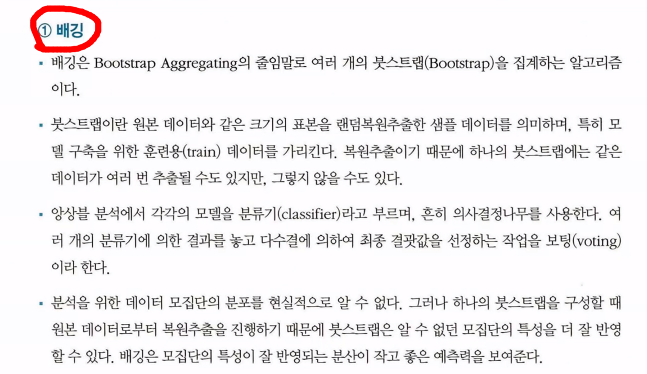

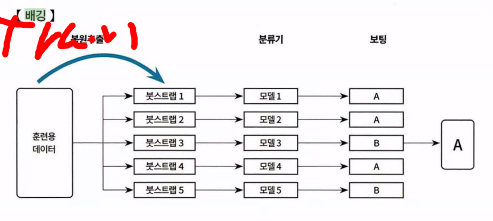

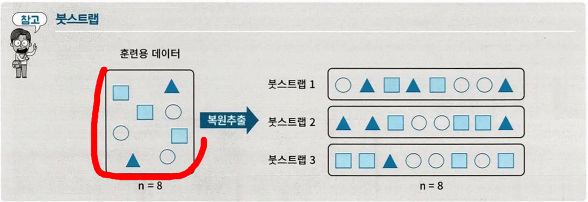

# 부스팅
* 오답노트처럼 작동하는 것
* 분류기들이 연결되어있음

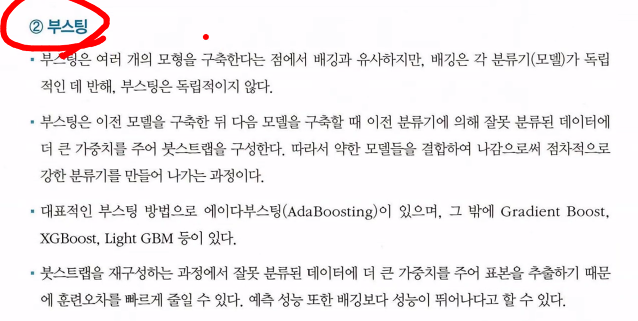

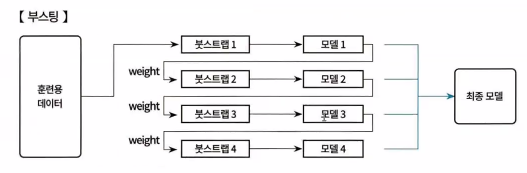

### 요즘 머신러닝 핫한 모델
* XGBoost, Light GBM, CatBoost

# 랜덤 포레스트(랜덤 배깅)
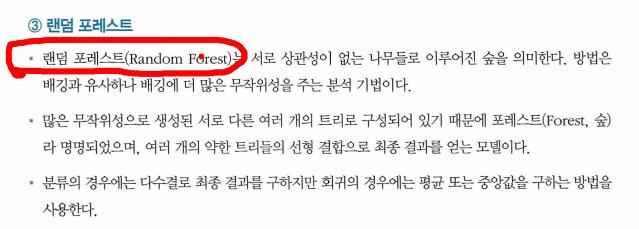

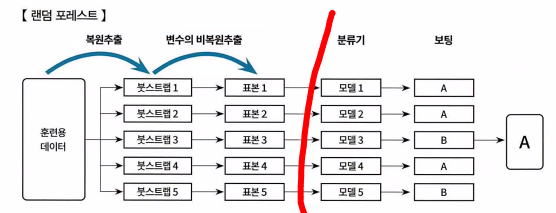

# 배깅, 부스팅, 랜덤배깅(포레스트)

# 1. 배깅
* 데이터셋에서 복원추출방법으로 부트스트랩을 여러개 만들고 각각의 부트스트랩을 분류기(의사결정나무)에 넣고 나온 결과를 다수결로 결정하는 방법
* 독립된 부트스트랩과 독립된 모델로 결과 도출
* 투표를 통해 결정

In [86]:
from sklearn.ensemble import BaggingClassifier

* parameter들 알아보기

* Ctrl + shift + ESC : 코어 개수 확인 → n_jobs 결정

In [87]:
bc = BaggingClassifier(n_estimators=10, n_jobs=2, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8426260833958916
              precision    recall  f1-score   support

       False       0.88      0.92      0.90     11127
        True       0.70      0.60      0.65      3526

    accuracy                           0.84     14653
   macro avg       0.79      0.76      0.77     14653
weighted avg       0.84      0.84      0.84     14653



In [88]:
est= DecisionTreeClassifier(max_depth=9, random_state=10)
bc = BaggingClassifier(estimator=est, n_estimators=10, n_jobs=2, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8609158534088582
              precision    recall  f1-score   support

       False       0.88      0.94      0.91     11127
        True       0.77      0.60      0.68      3526

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.86      0.86      0.85     14653



In [92]:
est= DecisionTreeClassifier(max_depth=9, random_state=10)
bc = BaggingClassifier(estimator=est, n_estimators=100, n_jobs=2, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8608476079983621
              precision    recall  f1-score   support

       False       0.88      0.95      0.91     11127
        True       0.78      0.59      0.67      3526

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [93]:
est= DecisionTreeClassifier(max_depth=9, random_state=10)
bc = BaggingClassifier(estimator=est, n_estimators=100, n_jobs=2, random_state=10)
bc.fit(X3_train, y3_train)
pred3 = bc.predict(X3_test)
print(accuracy_score(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.8563540604825008
              precision    recall  f1-score   support

       False       0.87      0.95      0.91      8829
        True       0.78      0.59      0.67      2943

    accuracy                           0.86     11772
   macro avg       0.83      0.77      0.79     11772
weighted avg       0.85      0.86      0.85     11772



# 2. 부스팅
* 처음 만든 부트스트랩을 분석한 후 정답은 제외하고 틀린 것만 모아서 다시 부트스트랩 만들고 공부 후 틀린 것을 다시 공부하는 것
* 점진적으로 성능이 향상되는 알고리즘
* XGBoost, LightGBM, Catboost
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

* learning_rate가 크면 속독, 작으면 꼼꼼하게 보는 것

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
abc = AdaBoostClassifier(estimator=est, n_estimators=100,learning_rate=0.5, random_state=10)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8634409335972156
              precision    recall  f1-score   support

       False       0.89      0.94      0.91     11127
        True       0.76      0.63      0.69      3526

    accuracy                           0.86     14653
   macro avg       0.83      0.78      0.80     14653
weighted avg       0.86      0.86      0.86     14653



In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
gbc = GradientBoostingClassifier( n_estimators=100,learning_rate=0.5,random_state=10)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.8699242475943493
              precision    recall  f1-score   support

       False       0.89      0.94      0.92     11127
        True       0.77      0.65      0.71      3526

    accuracy                           0.87     14653
   macro avg       0.83      0.79      0.81     14653
weighted avg       0.87      0.87      0.87     14653



# XGBoost
* 병렬연산이 가능해서 처리 속도가 매우 빨라짐
* 외부 라이브러리이기 때문에 따로 설치가 필요함

In [105]:
from xgboost import XGBClassifier

In [119]:
%%time
xgbc = XGBClassifier(max_depth=6,n_estimators=100,random_state=10)
xgbc.fit(X_train, y_train)
pred = xgbc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.867399167405992
              precision    recall  f1-score   support

       False       0.90      0.93      0.91     11127
        True       0.76      0.66      0.70      3526

    accuracy                           0.87     14653
   macro avg       0.83      0.79      0.81     14653
weighted avg       0.86      0.87      0.86     14653

CPU times: total: 1.45 s
Wall time: 246 ms


# LightGBM
* xgboost보다 속도를 더 빠르게
* 비대칭 트리를 만듦

In [113]:
from lightgbm import LGBMClassifier

In [118]:
%%time
lgbm = LGBMClassifier(n_estimators=100,random_state=10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8161, number of negative: 26028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 34189, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238703 -> initscore=-1.159806
[LightGBM] [Info] Start training from score -1.159806
0.8691735480788917
              precision    recall  f1-score   support

       False       0.90      0.94      0.92     11127
        True       0.77      0.66      0.71      3526

    accuracy                           0.87     14653
   macro avg       0.83      0.80      0.81     14653
weighted avg       0.86      0.87      0.87     14653

CPU times: total: 

# catboost
* http://catboost.ai/docs/en/
* 범주형 특화 알고리즘

In [120]:
from catboost import CatBoostClassifier

In [122]:
%%time
cat = CatBoostClassifier(n_estimators=100,learning_rate=0.1, random_state=10)
cat.fit(X_train, y_train)
pred = cat.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0:	learn: 0.5923915	total: 7.96ms	remaining: 789ms
1:	learn: 0.5255835	total: 15.3ms	remaining: 749ms
2:	learn: 0.4683284	total: 23.5ms	remaining: 761ms
3:	learn: 0.4285890	total: 32.8ms	remaining: 788ms
4:	learn: 0.4034361	total: 40.4ms	remaining: 768ms
5:	learn: 0.3830683	total: 47.9ms	remaining: 750ms
6:	learn: 0.3689588	total: 56.6ms	remaining: 751ms
7:	learn: 0.3584116	total: 65.3ms	remaining: 751ms
8:	learn: 0.3493477	total: 73.1ms	remaining: 739ms
9:	learn: 0.3423287	total: 80.4ms	remaining: 724ms
10:	learn: 0.3377885	total: 89.4ms	remaining: 723ms
11:	learn: 0.3341428	total: 97.5ms	remaining: 715ms
12:	learn: 0.3296150	total: 105ms	remaining: 703ms
13:	learn: 0.3276861	total: 112ms	remaining: 690ms
14:	learn: 0.3244185	total: 122ms	remaining: 690ms
15:	learn: 0.3225461	total: 130ms	remaining: 681ms
16:	learn: 0.3208691	total: 137ms	remaining: 667ms
17:	learn: 0.3190989	total: 145ms	remaining: 658ms
18:	learn: 0.3174987	total: 154ms	remaining: 657ms
19:	learn: 0.3160240	total: 1

# 3. 랜덤 배깅 (RandomForest)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
%%time
rfc = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.856548147137105
              precision    recall  f1-score   support

       False       0.87      0.96      0.91     11127
        True       0.81      0.53      0.64      3526

    accuracy                           0.86     14653
   macro avg       0.84      0.75      0.78     14653
weighted avg       0.85      0.86      0.85     14653

CPU times: total: 1.03 s
Wall time: 1.04 s
